In [5]:
from sklearn.datasets import make_blobs
import pandas as pd

In [6]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

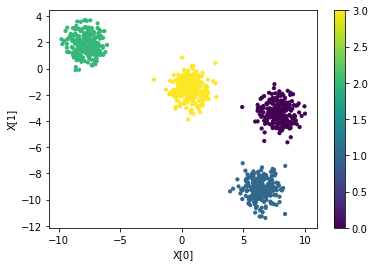

In [8]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()

In [9]:
X #feature data is continuous ,DT wont work on continuous feature data.DT translates it to categorical column

array([[ 9.25784958, -2.82526517],
       [ 0.96889603, -1.63014501],
       [-8.2630645 ,  0.90588073],
       ...,
       [ 5.51767708, -9.88164118],
       [ 6.60297118, -9.4394812 ],
       [ 7.38216345, -9.34058898]])

In [10]:
Y[:5]

array([0, 3, 2, 2, 2])

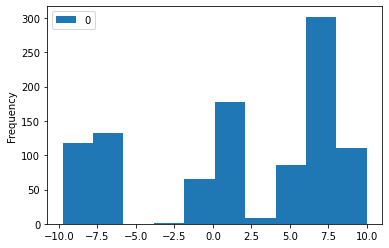

In [11]:
pd.DataFrame(X[:,0]).plot.hist()

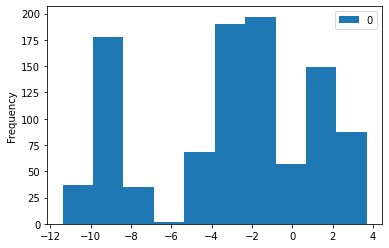

In [12]:
pd.DataFrame(X[:,1]).plot.hist()

In [13]:
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1]})
df[:5]

,X1,X2
0,9.257850,-2.825265
1,0.968896,-1.630145
2,-8.263065,0.905881
3,-7.857378,2.176657
4,-8.280008,1.984077


In [14]:
df['Target'] =Y

In [15]:
# def f(v):
#     if v <-4

# df.X1.map(f)

In [16]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [17]:
dt = DecisionTreeClassifier(criterion='entropy')

In [18]:
dt.fit(df[['X1','X2']],df.Target)

DecisionTreeClassifier(criterion='entropy')

In [19]:
export_graphviz(dt,'dt.tree')

In [23]:
tennis_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/tennis.csv.txt')

In [24]:
tennis_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
oe =OrdinalEncoder()

In [27]:
feature_data = oe.fit_transform(tennis_data)

In [28]:
feature_data

array([[2., 1., 0., 0., 0.],
       [2., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 2., 0., 0., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [2., 2., 0., 0., 0.],
       [2., 0., 1., 0., 1.],
       [1., 2., 1., 0., 1.],
       [2., 2., 1., 1., 1.],
       [0., 2., 0., 1., 1.],
       [0., 1., 1., 0., 1.],
       [1., 2., 0., 1., 0.]])

In [29]:
dt = DecisionTreeClassifier(criterion='entropy')

In [30]:
dt.fit(feature_data,tennis_data.play)

DecisionTreeClassifier(criterion='entropy')

In [31]:
oe.categories_

[array(['overcast', 'rainy', 'sunny'], dtype=object),
 array(['cool', 'hot', 'mild'], dtype=object),
 array(['high', 'normal'], dtype=object),
 array([False,  True]),
 array(['no', 'yes'], dtype=object)]

In [32]:
import numpy as np

In [33]:
(3/6)*np.log2(3/6)

-0.5

In [34]:
np.log2(1)

0.0

In [35]:
(2/7)*np.log2(2/7)+(5/7)*np.log2(5/7)

-0.863120568566631

In [36]:
0.3

0.3

In [37]:
#Entropy before split
tennis_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [38]:
E_before_split = -((9/14)*np.log2(9/14)+(5/14)*np.log2(5/14))
E_before_split

0.9402859586706311

In [39]:
data = pd.DataFrame(feature_data, columns=['outlook','temp','humidity','windy','play'], dtype='int')

In [40]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [41]:
data[data.outlook <= 0.5].play.value_counts()

1    4
Name: play, dtype: int64

In [42]:
E_left = -((4/4)*np.log2(4/4))
E_left

-0.0

In [43]:
data[data.outlook > 0.5].play.value_counts()

1    5
0    5
Name: play, dtype: int64

In [44]:
E_right = -((5/10)*np.log2(5/10) + (5/10)*np.log2(5/10))
E_right

1.0

In [45]:
E_split = E_left * (4/14) + E_right * (10/14)
E_split

0.7142857142857143

In [46]:
Information_Gain = E_before_split - E_split
Information_Gain

0.22600024438491684

In [47]:
data[data.outlook <= 1.5].play.value_counts()  #E_left -->total no of ele 9

1    7
0    2
Name: play, dtype: int64

In [48]:
pd.DataFrame(data[data.outlook <= 1.5].play.value_counts())

,play
1,7
0,2


In [49]:
E_left = -((7/9)*np.log2(7/9) + (2/9)*np.log2(2/9) )
E_left

0.7642045065086203

In [50]:
data[data.outlook > 1.5].play.value_counts() #E_right -->total no of ele 5

0    3
1    2
Name: play, dtype: int64

In [51]:
E_right = -((3/5)*np.log2(3/5) + (2/5)*np.log2(2/5))
E_right

0.9709505944546686

In [52]:
E_split = E_left * (9/14) + E_right * (5/14)
E_split

0.8380423950607804

In [53]:
Information_Gain = E_before_split - E_split
Information_Gain

0.10224356360985076

In [54]:
tennis_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/tennis.csv.txt')

In [55]:
tennis_data.head(5)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [56]:
from sklearn.preprocessing import OrdinalEncoder

In [57]:
oe = OrdinalEncoder()
feature_data = oe.fit_transform(tennis_data)

In [58]:
data = pd.DataFrame(feature_data,columns = ['outlook','temp','humidity','windy','play'],dtype='int')

data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [59]:
data.play

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [60]:
T0 = data.play.value_counts()[0]
T1 = data.play.value_counts()[1]
Total = T0 + T1

In [61]:
EntropyBeforeSplit = -((T0/Total) * np.log2(T0/Total) + (T1/Total) * np.log2(T1/Total))
EntropyBeforeSplit

0.9402859586706311

In [123]:
class DecisionTreeClassifierGini:
    def __init__(self):
        self.ranges_data = {}
        
    def calculate_decisions(self,data):
        for each_column in data.columns:
            max_range = data[each_column].unique().max()
            i = 0.5
            range_cols = []
            while i < max_range:
                range_cols.append(i)
                i += 1
            self.ranges_data[each_column] = range_cols
        return self.ranges_data
    
    def calGini(self,target):
        total = target.value_counts().values.sum()
        l = list(target.value_counts().values)
        gini = 0
        for x in l:
            gini += (x/total) * (1-(x/total))
        return gini
    
    def choose_decision_node(self,data):
        GiniBeforeSplit = self.calGini(data.target)
        if GiniBeforeSplit == 0:
            return
        print('GiniBeforeSplit',GiniBeforeSplit)
        max_gini_gain = 0
        for feature,values in self.ranges_data.items():
            for value in values:
                print('\nFor',feature,value)
                print('.......................')
                dataLeft = data[data[feature] < value]
                GiniLeft = self.calGini(dataLeft.target)
                print('GiniLeft',GiniLeft)
                
                dataRight = data[data[feature] > value]
                GiniRight = self.calGini(dataRight.target)
                print('GiniRight',GiniRight)
                
                Gini_split = (dataLeft.shape[0]/data.shape[0])*GiniLeft + (dataRight.shape[0]/data.shape[0])*GiniRight
                print('Gini_split',Gini_split)
                Gini_Gain = GiniBeforeSplit - Gini_split
                
                print("Gini_gain for",feature,value,'---->',Gini_Gain)
                if Gini_Gain > max_gini_gain:
                    max_gini_gain = Gini_Gain
                    best_dataLeft = dataLeft
                    best_dataRight= dataRight
                    best_feature = feature
                    best_value = value
                    
#         print('GiniLeft',GiniLeft)
#         print('Gini-Right',GiniRight)
#         print('Gini_split',Gini_split)
#         print("Gini_gain",Gini_Gain)
        print('-----------------------------\n')
        print('best_value,best_feature',best_value,best_feature)
        print('best_dataLeft\n',best_dataLeft)
        print('best_dataRight\n',best_dataRight)
        print('**************************\n')         
        
        self.choose_decision_node(best_dataLeft)
        
        self.choose_decision_node(best_dataRight)
        
    def myfit(self, feature_data, target_data):
        GiniBeforeSplit = self.calGini(target_data)

        feature_data['target'] = target_data
        data = feature_data
        self.choose_decision_node(data)
        
    
    def mypredict(self,feature_data):
        pass

In [124]:
dt = DecisionTreeClassifierGini()

In [125]:
dt.calculate_decisions(data.drop(columns=['play']))

{'outlook': [0.5, 1.5], 'temp': [0.5, 1.5], 'humidity': [0.5], 'windy': [0.5]}

In [126]:
feature_dataset = data.drop(columns=['play'])

target_data = data.play


In [127]:
dt.myfit(feature_dataset,target_data)

GiniBeforeSplit 0.4591836734693877

For outlook 0.5
.......................
GiniLeft 0.0
GiniRight 0.5
Gini_split 0.35714285714285715
Gini_gain for outlook 0.5 ----> 0.10204081632653056

For outlook 1.5
.......................
GiniLeft 0.345679012345679
GiniRight 0.48
Gini_split 0.3936507936507937
Gini_gain for outlook 1.5 ----> 0.06553287981859401

For temp 0.5
.......................
GiniLeft 0.375
GiniRight 0.48
Gini_split 0.45
Gini_gain for temp 0.5 ----> 0.009183673469387699

For temp 1.5
.......................
GiniLeft 0.46875
GiniRight 0.4444444444444445
Gini_split 0.4583333333333333
Gini_gain for temp 1.5 ----> 0.000850340136054395

For humidity 0.5
.......................
GiniLeft 0.4897959183673469
GiniRight 0.24489795918367352
Gini_split 0.3673469387755102
Gini_gain for humidity 0.5 ----> 0.09183673469387749

For windy 0.5
.......................
GiniLeft 0.375
GiniRight 0.5
Gini_split 0.42857142857142855
Gini_gain for windy 0.5 ----> 0.030612244897959162
------------------

In [76]:
from sklearn.tree import export_graphviz,DecisionTreeClassifier

In [80]:
d = DecisionTreeClassifier(criterion='gini')
d.fit(data.drop(columns=['play']),data.play, )

DecisionTreeClassifier()

In [81]:
export_graphviz(d, 'dt-gini.tree',feature_names=['outlook','temp','humidity','windy'])

In [116]:
data[data['outlook'] <= 0.5].play.value_counts()

1    4
Name: play, dtype: int64

In [117]:
data[data['outlook'] >= 0.5].play.value_counts()

1    5
0    5
Name: play, dtype: int64